Actual Value :1 and Predicted value is :0
Actual Value :1 and Predicted value is :0
Actual Value :0 and Predicted value is :0
accuracy : 0.3333333333333333


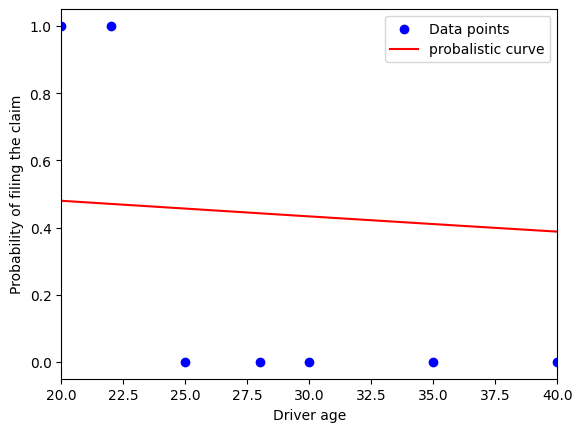

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=np.array([[18],[20],[22],[25],[28],[30],[35],[40],[45],[50]])
y=np.array([1,1,1,0,0,0,0,0,1,1])

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.3,random_state=42
)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

for actual,pred in zip(y_test,y_pred):
    print(f'Actual Value :{actual} and Predicted value is :{pred}')

accuracy = accuracy_score(y_test,y_pred)
print(f"accuracy : {accuracy}")

plt.scatter(X,y,color='blue',label='Data points')
x_range = np.linspace(15,55,200).reshape(-1,1)
y_prob = model.predict_proba(x_range)[:,1]
plt.plot(x_range,y_prob,color='red',label='probalistic curve')
plt.xlabel('Driver age')
plt.ylabel('Probability of filing the claim')
plt.xlim(20,40)
plt.legend()
plt.show()


[[15.        ]
 [15.20100503]
 [15.40201005]
 [15.60301508]
 [15.8040201 ]
 [16.00502513]
 [16.20603015]
 [16.40703518]
 [16.6080402 ]
 [16.80904523]
 [17.01005025]
 [17.21105528]
 [17.4120603 ]
 [17.61306533]
 [17.81407035]
 [18.01507538]
 [18.2160804 ]
 [18.41708543]
 [18.61809045]
 [18.81909548]
 [19.0201005 ]
 [19.22110553]
 [19.42211055]
 [19.62311558]
 [19.8241206 ]
 [20.02512563]
 [20.22613065]
 [20.42713568]
 [20.6281407 ]
 [20.82914573]
 [21.03015075]
 [21.23115578]
 [21.4321608 ]
 [21.63316583]
 [21.83417085]
 [22.03517588]
 [22.2361809 ]
 [22.43718593]
 [22.63819095]
 [22.83919598]
 [23.04020101]
 [23.24120603]
 [23.44221106]
 [23.64321608]
 [23.84422111]
 [24.04522613]
 [24.24623116]
 [24.44723618]
 [24.64824121]
 [24.84924623]
 [25.05025126]
 [25.25125628]
 [25.45226131]
 [25.65326633]
 [25.85427136]
 [26.05527638]
 [26.25628141]
 [26.45728643]
 [26.65829146]
 [26.85929648]
 [27.06030151]
 [27.26130653]
 [27.46231156]
 [27.66331658]
 [27.86432161]
 [28.06532663]
 [28.26633